# Shopify Fall 2021 Data Science Intern Challenge
### Michael Joseph Holt
### 5/9/2021

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The question is as follows:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

[a](#a). Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

[b](#b). What metric would you report for this dataset?

[c](#c). What is its value?


# a

As a first guess, I suspect that something is pulling up the average, or mean, value. The mean can be pulled away from a descriptive center value by extremely high or low values. 

In [3]:
#importing the file
stores = pd.read_csv('data/2019 Winter Data Science Intern Challenge Data Set.csv')
stores.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


These are sneaker shops. I checked some online sneaker stores ([Sneakers Worlds](https://sneakers-worlds.myshopify.com/collections/nike)) ([Packer](https://packershoes.com/)) and saw that each pair of sneakers costs in the hundreds of dollars.

As such, I will assume that the price of the shoes is **order_amount** in dollars ($). I will also be assuming that **total_items** is the number of pairs of shoes, as not many people purchase one shoe at a time.

To see how the **order_amount**s are distributed, I will create a quick histogram: 

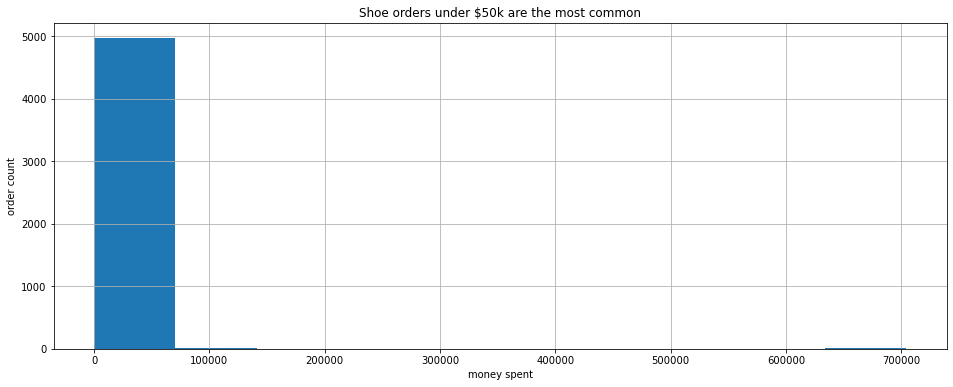

In [4]:
#showing the frequency of purchaces at different price ranges.
plt.figure(figsize = (16, 6))
stores.order_amount.hist()
plt.title('Shoe orders under $50k are the most common')
plt.ylabel('order count')
plt.xlabel('money spent')
plt.show()

There appear to be high outliers.

I suspect that **order_amount** increases with **total_items**, such that buying ten items costs more than 1 item.

In [5]:
# finding correlation between them
stores.order_amount.corr(stores.total_items, method = 'pearson')

0.9917468694158098

**order_amount** has a large positive correlation with **total_items**.

In [6]:
# finding their descriptive statistics
stores.describe().loc[:, ['order_amount', 'total_items']]

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


### a. Answer: A few people bulk buy shoes from shopify stores. Most do not. These bulk buys make the mean order_amount higher than the majority of shopify customers.

A better way to evaluate this data may be to break it into quartiles and see how the majority of people use this service.

# b

### b. Answer: The median value should be the most descriptive in this case.

Sorting the orders by amount of money and finding the middle value is a handy way to find a distribution's central tendency when the mean is being stretched by a few extreme values.

# c

In [14]:
help(round)

Help on built-in function round in module builtins:

round(number, ndigits=None)
    Round a number to a given precision in decimal digits.
    
    The return value is an integer if ndigits is omitted or None.  Otherwise
    the return value has the same type as the number.  ndigits may be negative.



In [21]:
median_order_amount = stores.describe().loc['50%', 'order_amount']

print(f'The median order amount is ${median_order_amount}')

The median order amount is $284.0


### c. Answer: The median order amount is $284